News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.

In [ ]:
News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.

In [2]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    tweet_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            tweet_list.append(tweet["text"])
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list,
        "Tweets": tweet_list
        }
    
    # Append airline results to 'results_list'
    results_list.append(sent)
            

In [4]:
#Define variables for x and y values for scatter plot 
#BBCNews
y_bbc = results_list[0]["Compound"]
x_bbc = results_list[0]["Number"]

#CBS
y_cbs = results_list[1]["Compound"]
x_cbs = results_list[1]["Number"]

#CNN
y_cnn = results_list[2]["Compound"]
x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = results_list[3]["Compound"]
x_fox = results_list[3]["Number"]

#nytimes
y_nyt = results_list[4]["Compound"]
x_nyt = results_list[4]["Number"]

In [5]:
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count,Tweets
User,,,,,,,
@BBC,"[-0.7579, 0.0, 0.0, 0.0772, -0.5829, 0.0, 0.0,...","[0.667, 1.0, 1.0, 0.599, 0.79, 1.0, 1.0, 1.0, ...","[0.333, 0.0, 0.0, 0.162, 0.21, 0.0, 0.0, 0.0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.24, 0.0, 0.0, 0.0, 0.0, 0.17...",100,[Film-maker @RogerRossWill examines the Americ...
@CBS,"[0.6696, 0.3612, 0.0772, 0.5423, -0.3612, 0.0,...","[0.817, 0.902, 0.936, 0.8, 0.821, 1.0, 0.811, ...","[0.0, 0.0, 0.0, 0.0, 0.179, 0.0, 0.189, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.183, 0.098, 0.064, 0.2, 0.0, 0.0, 0.0, 0.17...",100,[RT @WorldsBestCBS: It’s the world’s best news...
@CNN,"[0.0, 0.399, -0.8834, 0.0, -0.8834, -0.0516, -...","[1.0, 0.856, 0.636, 1.0, 0.593, 0.789, 0.729, ...","[0.0, 0.0, 0.364, 0.0, 0.407, 0.109, 0.16, 0.1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.144, 0.0, 0.0, 0.0, 0.102, 0.111, 0.11...",100,[Netflix is buying its first production studio...
@FoxNews,"[0.296, -0.4585, 0.2023, 0.0, 0.6369, -0.296, ...","[0.658, 0.7, 0.87, 1.0, 0.743, 0.845, 1.0, 0.7...","[0.132, 0.3, 0.0, 0.0, 0.0, 0.155, 0.0, 0.211,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.211, 0.0, 0.13, 0.0, 0.257, 0.0, 0.0, 0.0, ...",100,"[Oklahoma girl, 4, electrocuted trying to save..."
@nytimes,"[-0.296, 0.296, -0.25, 0.0, 0.4939, 0.0, -0.15...","[0.909, 0.905, 0.776, 1.0, 0.862, 1.0, 0.766, ...","[0.091, 0.0, 0.134, 0.0, 0.0, 0.0, 0.128, 0.0,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.095, 0.091, 0.0, 0.138, 0.0, 0.106, 0....",100,[The youngest child to come before the bench i...


In [6]:
#save DataFrame to csv
news_df.to_csv("Sentiment_Data.csv")

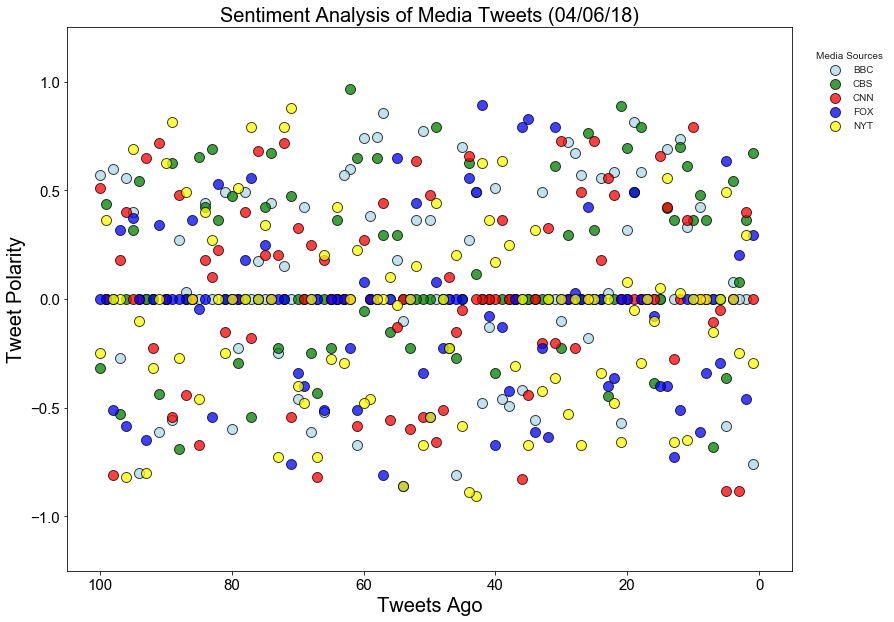

In [7]:

fix, ax  = plt.subplots(figsize =(13,10))

sns.set_style("darkgrid")

plt.ylim(-1.25,1.25)
plt.xlim(105,-5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Tweets Ago", fontsize=20)
plt.ylabel("Tweet Polarity", fontsize=20)
plt.title("Sentiment Analysis of Media Tweets (04/06/18)", fontsize=20)

plt.scatter(x_bbc, y_bbc, marker="o", s=100, facecolors="lightblue", edgecolors="black", alpha=.75, label='BBC')
plt.scatter(x_cbs, y_cbs, marker="o", s=100, facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
plt.scatter(x_cnn, y_cnn, marker="o", s=100, facecolors="red", edgecolors="black", alpha=0.75, label="CNN")
plt.scatter(x_fox, y_fox, marker="o", s=100, facecolors="blue", edgecolors="black", alpha=0.75, label="FOX")
plt.scatter(x_nyt, y_nyt, marker="o", s=100, facecolors="yellow", edgecolors="black", alpha=0.75, label="NYT")
plt.legend(title="Media Sources", fontsize=10, bbox_to_anchor=(1,1), loc=2, borderaxespad=2)

plt.savefig('news_scatterplot.png')

plt.show()

In [8]:
#Calculating compound average for tweet polarity

y_bbc = np.mean(results_list[0]["Compound"])
#x_bbc = results_list[0]["Text"]

#CBS
y_cbs = np.mean(results_list[1]["Compound"])
#x_cbs = results_list[1]["Number"]

#CNN
y_cnn = np.mean(results_list[2]["Compound"])
#x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = np.mean(results_list[3]["Compound"])
#x_fox = results_list[3]["Number"]

#nytimes
y_nyt = np.mean(results_list[4]["Compound"])
#x_nyt = results_list[4]["Number"]

y_cities = [y_bbc, y_cbs, y_cnn, y_fox, y_nyt]
colors = ["lightblue","green","red","blue","yellow"]
media_names = ["BBC", "CBS", "CNN", "FOX", "NYT"]

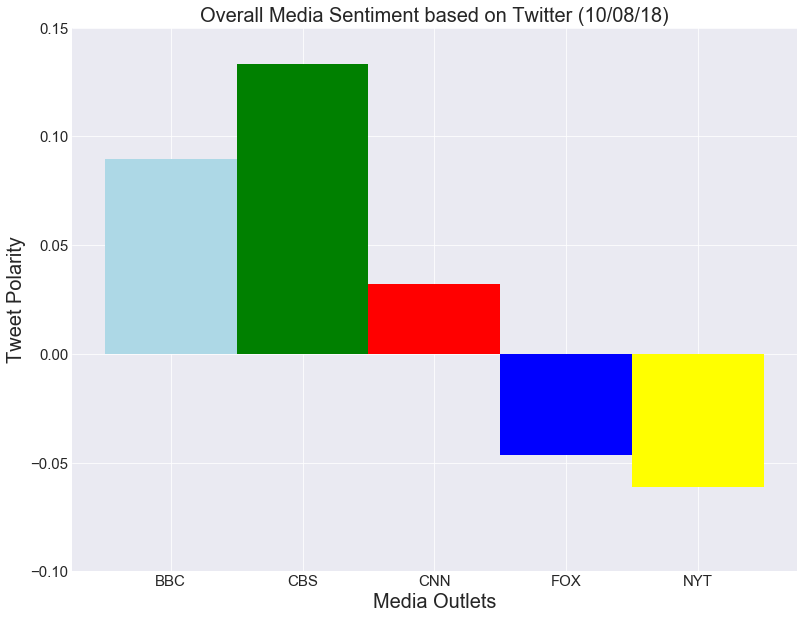

In [9]:
fig, ax  = plt.subplots(figsize =(13,10))
#sns.set_style("darkgrid")
#ax.grid(True)

plt.ylim(-.1,.15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel("Tweet Polarity", fontsize=20)
plt.xlabel("Media Outlets", fontsize=20)
plt.title("Overall Media Sentiment based on Twitter (10/08/18)", fontsize=20)

y = plt.bar(media_names, y_cities, color=colors, align="center", width=1)

plt.savefig('news_barplot.png')

plt.show()
